<a href="https://colab.research.google.com/github/evcereti/Aprendiendo_ML_y_DS/blob/main/Regresion_Lineal_Simple_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresion Lineal Simple

Este es un notebook simple donde se explora la manera en que se puede usar scikit-learn para generar predicciones sobre relaciones aproximadamente lineales.

##Librerias necesarias

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importando y analizando el Dataset

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

El primer paso, despues de tener el dataset en nuestras manos, es revisar los nombres de las columnas y los tipos de datos que contiene. Siempre es importante conocer el tipo de problema que estamos analizando.


In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Vemos que es una tabla sencilla con dos columnas: Salario y Experiencia(años).

Suponemos en este caso que estamos hablando de una muestra estadistica donde se pregunta a los encuestados cuantos años tienen de experiencia en algún sector y el crecimiento salarial que han obtenido.

Podemos graficar estas variables para entender que tipo de relación existe entre las dos columnas.

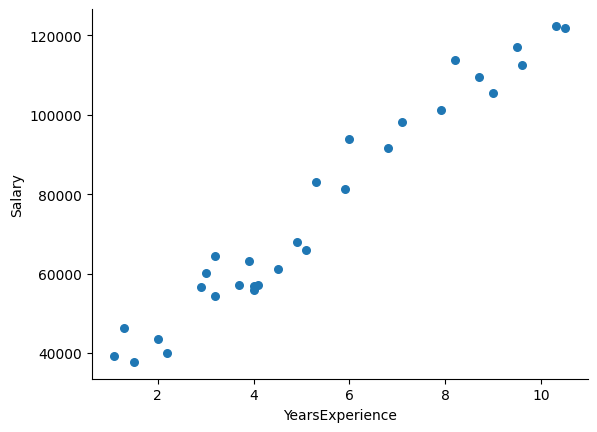

In [28]:
dataset.plot(kind='scatter', x='YearsExperience', y='Salary', s=30)
plt.gca().spines[['top', 'right',]].set_visible(False)

Vemos que la relacion entre las variables es aproximadamente lineal, asi que se justifica usar regresion lineal para realizar predicciones.

#Generando los conjuntos para Entrenamiento y Testing.

Convertimos el dataset en una matriz de Features X y un vector de etiquetas y.
Posteriormente separamos en subconjuntos Train y Test donde ocupamos la mayor parte de los puntos muestrales (2/3) para entrenar nuestro modelo.

In [29]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=0)


##Entrenando el modelo

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

##Generando el vector de predicciones

In [31]:
y_pred = regressor.predict(X_test)

#visualizando el Conjunto de entrenamiento

Graficamos los puntos muestrales (rojo) contra su aproximacion lineal (verde) en el conjunto de entrenamiento.

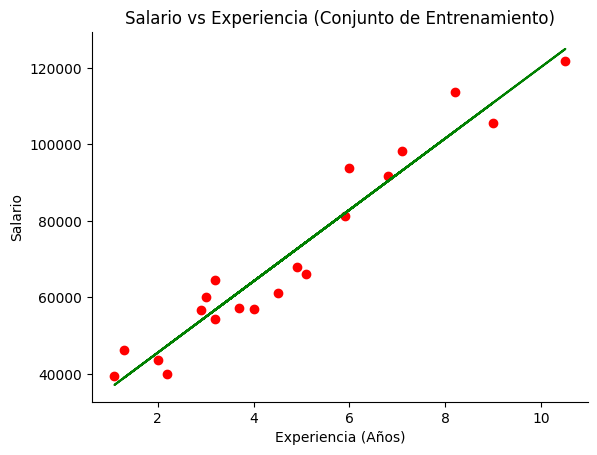

In [48]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='green')
plt.title("Salario vs Experiencia (Conjunto de Entrenamiento)")
plt.xlabel("Experiencia (Años)")
plt.ylabel("Salario")
plt.gca().spines[['top', 'right',]].set_visible(False)

Vemos que la recta que hemos aproximado pasa por el "centro" de los puntos muestrales en la región de entrenamiento. El modelo aproxima los datos razonablemente bien en esta region.

#Visualizando el conjunto de Pruebas

Repetimos el procedimiento anterior pero ahora con el conjunto de pruebas.

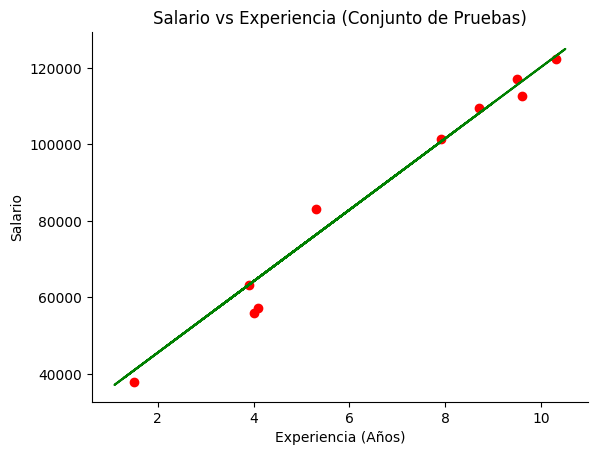

In [47]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='green')
plt.title("Salario vs Experiencia (Conjunto de Pruebas)")
plt.xlabel("Experiencia (Años)")
plt.ylabel("Salario")
plt.gca().spines[['top', 'right',]].set_visible(False)

Finalmente, vemos que el modelo predice correctamente el comportamiento de la muestra en la región de pruebas.